In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TÃ¼rkÃ§e karakter uyumu iÃ§in
plt.rcParams['font.family'] = 'Arial'

# Veri setini yÃ¼kle
df = pd.read_csv("../data/enerji_optimizasyon_veri_seti.csv")

# Ä°lk 5 satÄ±rÄ± gÃ¶rÃ¼ntÃ¼le
df.head()


Tarih  Saat  Ãœretim_MiktarÄ±_adet  Hava_SÄ±caklÄ±ÄŸÄ±_C  \
0  2025-06-01     0                  515              14.7   
1  2025-06-01     1                  519              14.9   
2  2025-06-01     2                  536              17.4   
3  2025-06-01     3                  578              14.1   
4  2025-06-01     4                  556              20.6   

   Hammadde_SÄ±caklÄ±ÄŸÄ±_C  Enerji_TÃ¼ketimi_kWh  
0                  25.7                40.78  
1                  27.2                39.66  
2                  26.7                38.76  
3                  21.5                39.16  
4                  29.3                39.10

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\monster\AppData\Local\Temp\ipykernel_15192\1497528720.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Saat", y="Enerji_TÃ¼ketimi_kWh", ci=None)


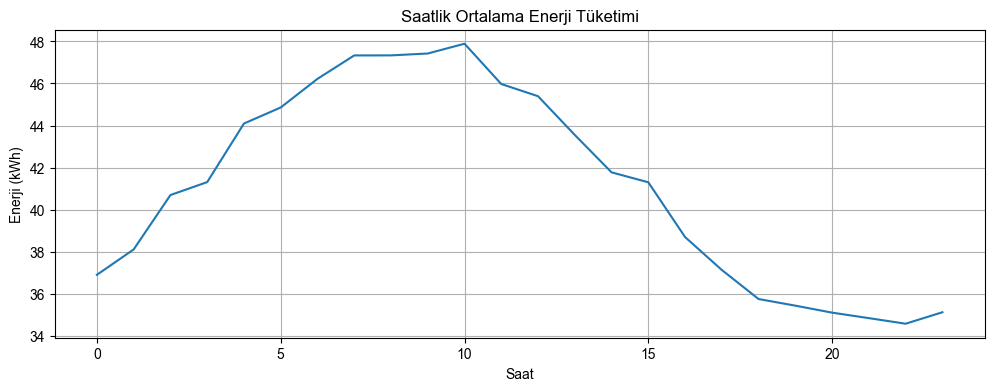

In [4]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x="Saat", y="Enerji_TÃ¼ketimi_kWh", ci=None)
plt.title("Saatlik Ortalama Enerji TÃ¼ketimi")
plt.xlabel("Saat")
plt.ylabel("Enerji (kWh)")
plt.grid(True)
plt.show()


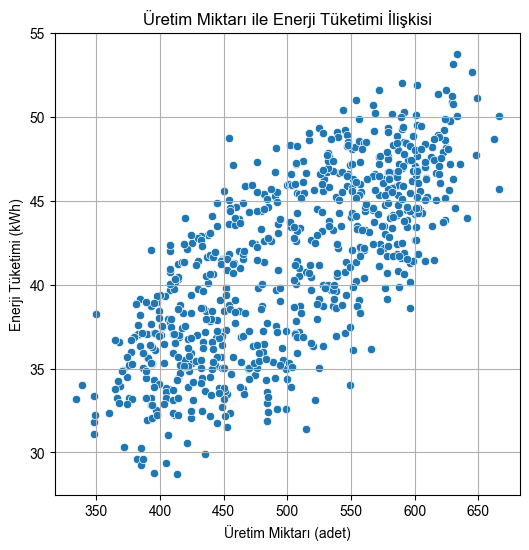

In [5]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Ãœretim_MiktarÄ±_adet", y="Enerji_TÃ¼ketimi_kWh")
plt.title("Ãœretim MiktarÄ± ile Enerji TÃ¼ketimi Ä°liÅŸkisi")
plt.xlabel("Ãœretim MiktarÄ± (adet)")
plt.ylabel("Enerji TÃ¼ketimi (kWh)")
plt.grid(True)
plt.show()



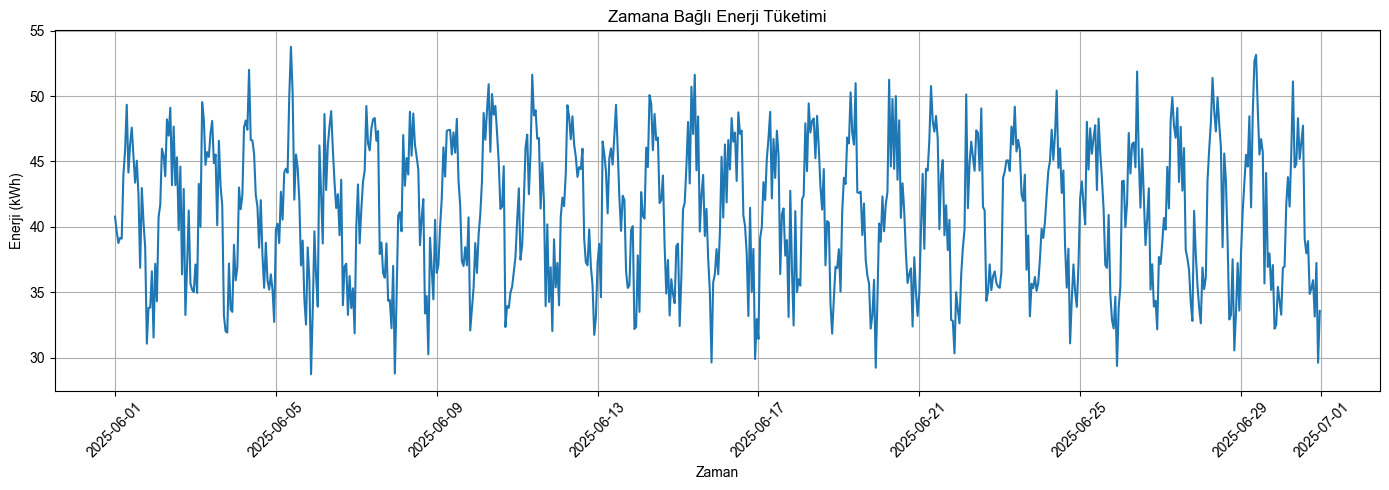

In [6]:
# Zaman sÃ¼tununu oluÅŸtur
df["Zaman"] = pd.to_datetime(df["Tarih"]) + pd.to_timedelta(df["Saat"], unit="h")

# Zaman serisi grafiÄŸi
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="Zaman", y="Enerji_TÃ¼ketimi_kWh")
plt.title("Zamana BaÄŸlÄ± Enerji TÃ¼ketimi")
plt.xlabel("Zaman")
plt.ylabel("Enerji (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# X ve y'yi ayÄ±r
X = df[["Ãœretim_MiktarÄ±_adet", "Hava_SÄ±caklÄ±ÄŸÄ±_C", "Hammadde_SÄ±caklÄ±ÄŸÄ±_C"]]
y = df["Enerji_TÃ¼ketimi_kWh"]

# Veriyi eÄŸitim ve test olarak ayÄ±r (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
!pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 7.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/10.7 MB 7.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/10.7 MB 7.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 9.1 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.7 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   -- ------------------------------------- 2.1/41.3 MB 10.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/41.3 MB 10.9 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/41.3 MB 11.2 MB/s eta 0:00:04
   -------- ------------------------------- 8.7/41.3 MB 11.0 MB/s eta 0:00:03
   ---------- ----------------------------- 11.0/41.3 MB 10.9 MB/s eta 0:00:03
   ---

In [9]:
import sklearn
print("scikit-learn yÃ¼klÃ¼ ðŸš€")


scikit-learn yÃ¼klÃ¼ ðŸš€


In [11]:
from sklearn.model_selection import train_test_split

X = df[["Ãœretim_MiktarÄ±_adet", "Hava_SÄ±caklÄ±ÄŸÄ±_C", "Hammadde_SÄ±caklÄ±ÄŸÄ±_C"]]
y = df["Enerji_TÃ¼ketimi_kWh"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Test verisiyle tahmin yap
y_pred = model.predict(X_test)

# DeÄŸerlendirme metriklerini hesapla
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")
print(f"MSE (Ortalama Kare Hata): {mse:.2f}")
print(f"R2 Skoru: {r2:.2f}")


MAE (Ortalama Mutlak Hata): 1.52
MSE (Ortalama Kare Hata): 3.66
R2 Skoru: 0.87


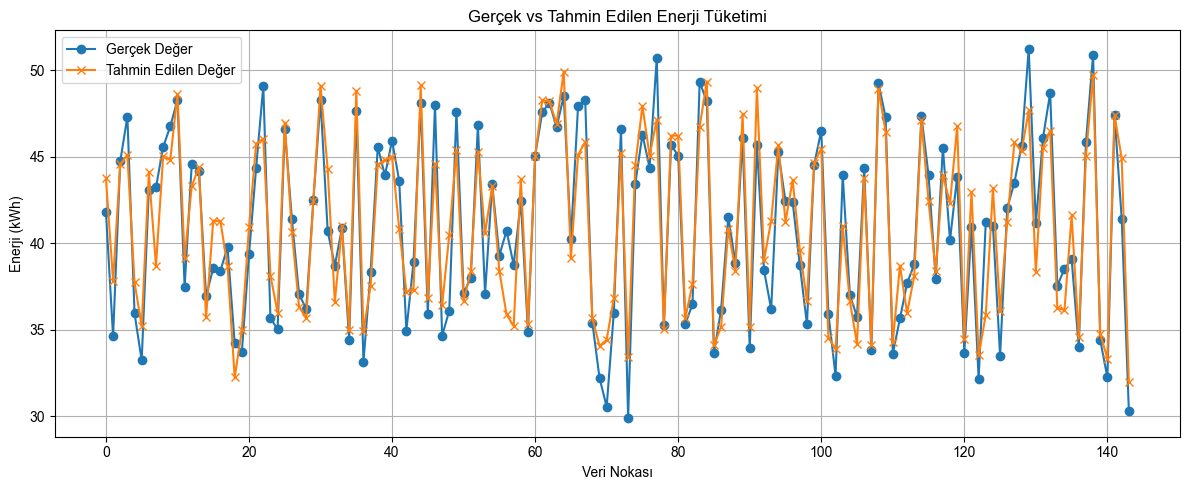

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="GerÃ§ek DeÄŸer", marker='o')
plt.plot(y_pred, label="Tahmin Edilen DeÄŸer", marker='x')
plt.title("GerÃ§ek vs Tahmin Edilen Enerji TÃ¼ketimi")
plt.xlabel("Veri NokasÄ±")
plt.ylabel("Enerji (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Ã–rnek bir veriyle enerji tÃ¼ketimi tahmini
ornek_veri = np.array([[500, 32, 35]])  # Ã¼retim, hava sÄ±caklÄ±ÄŸÄ±, hammadde sÄ±caklÄ±ÄŸÄ±
tahmin = model.predict(ornek_veri)
print(f"Tahmin Edilen Enerji TÃ¼ketimi (kWh): {tahmin[0]:.2f}")


Tahmin Edilen Enerji TÃ¼ketimi (kWh): 42.91


C:\Users\monster\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# KatsayÄ±lar (feature importance)
feature_names = X.columns
coefficients = model.coef_

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.2f}")


Ãœretim_MiktarÄ±_adet: 0.05
Hava_SÄ±caklÄ±ÄŸÄ±_C: 0.26
Hammadde_SÄ±caklÄ±ÄŸÄ±_C: 0.14


In [18]:

ornek_df = pd.DataFrame([[500, 32, 35]], columns=["Ãœretim_MiktarÄ±_adet", "Hava_SÄ±caklÄ±ÄŸÄ±_C", "Hammadde_SÄ±caklÄ±ÄŸÄ±_C"])
tahmin = model.predict(ornek_df)
print(f"Tahmin Edilen Enerji TÃ¼ketimi (kWh): {tahmin[0]:.2f}")


Tahmin Edilen Enerji TÃ¼ketimi (kWh): 42.91


In [19]:
import pickle

# Modeli dosyaya kaydet
with open("enerji_tahmin_modeli.pkl", "wb") as dosya:
    pickle.dump(model, dosya)

print("Model baÅŸarÄ±yla kaydedildi âœ…")


Model baÅŸarÄ±yla kaydedildi âœ…


In [20]:
!pip install xgboost
!pip install scikit-learn


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
    --------------------------------------- 2.4/150.0 MB 9.0 MB/s eta 0:00:17
    --------------------------------------- 3.7/150.0 MB 7.8 MB/s eta 0:00:19
   - -------------------------------------- 5.2/150.0 MB 8.0 MB/s eta 0:00:19
   - -------------------------------------- 6.8/150.0 MB 8.1 MB/s eta 0:00:18
   -- ------------------------------------- 8.4/150.0 MB 7.9 MB/s eta 0:00:18
   -- ------------------------------------- 10.0/150.0 MB 7.8 MB/s eta 0:00:19
   --- ------------------------------------ 11.5/150.0 MB 7.8 MB/s eta 0:00:18
   --- ------------------------------------ 13.4/150.0 MB 7.9 MB/s eta 0:00:18
   ---- ----------------------------------- 15.2/150.0 MB 8.0 MB/s eta 0:00:17
   ---- ----------------------------------- 17.0/150.0 MB 8.1 MB/s eta 0:00:17
   ----- ---------------------------------- 18.9/150.0 MB 8.3 MB/s eta 0:

In [21]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

# SonuÃ§larÄ± yazdÄ±r
for model_name, metrics in results.items():
    print(f"ðŸ“Œ {model_name}")
    print(f"  ðŸ”¸ MAE : {metrics['MAE']:.2f}")
    print(f"  ðŸ”¸ MSE : {metrics['MSE']:.2f}")
    print(f"  ðŸ”¸ R2  : {metrics['R2']:.2f}")
    print("-" * 30)


ðŸ“Œ Linear Regression
  ðŸ”¸ MAE : 1.52
  ðŸ”¸ MSE : 3.66
  ðŸ”¸ R2  : 0.87
------------------------------
ðŸ“Œ Random Forest
  ðŸ”¸ MAE : 1.67
  ðŸ”¸ MSE : 4.82
  ðŸ”¸ R2  : 0.83
------------------------------
ðŸ“Œ XGBoost
  ðŸ”¸ MAE : 1.94
  ðŸ”¸ MSE : 6.32
  ðŸ”¸ R2  : 0.78
------------------------------


In [22]:
# Yeni Ã¶znitelikleri oluÅŸtur
df["SÄ±caklÄ±k_FarkÄ±_C"] = df["Hammadde_SÄ±caklÄ±ÄŸÄ±_C"] - df["Hava_SÄ±caklÄ±ÄŸÄ±_C"]
df["Ortalama_SÄ±caklÄ±k_C"] = (df["Hava_SÄ±caklÄ±ÄŸÄ±_C"] + df["Hammadde_SÄ±caklÄ±ÄŸÄ±_C"]) / 2
df["Enerji_Birim_Uretim"] = df["Enerji_TÃ¼ketimi_kWh"] / df["Ãœretim_MiktarÄ±_adet"]


In [23]:
X = df[["Ãœretim_MiktarÄ±_adet", "Hava_SÄ±caklÄ±ÄŸÄ±_C", "Hammadde_SÄ±caklÄ±ÄŸÄ±_C",
        "SÄ±caklÄ±k_FarkÄ±_C", "Ortalama_SÄ±caklÄ±k_C"]]
y = df["Enerji_TÃ¼ketimi_kWh"]

# Veriyi ayÄ±r
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MAE": mae, "MSE": mse, "R2": r2}

# SonuÃ§larÄ± yazdÄ±r
for model_name, metrics in results.items():
    print(f"\nðŸ“Œ {model_name}")
    print(f"ðŸ”¸ MAE : {metrics['MAE']:.2f}")
    print(f"ðŸ”¸ MSE : {metrics['MSE']:.2f}")
    print(f"ðŸ”¸ R2  : {metrics['R2']:.2f}")
    print("-" * 30)



ðŸ“Œ Linear Regression
ðŸ”¸ MAE : 1.52
ðŸ”¸ MSE : 3.66
ðŸ”¸ R2  : 0.87
------------------------------

ðŸ“Œ Random Forest
ðŸ”¸ MAE : 1.65
ðŸ”¸ MSE : 4.64
ðŸ”¸ R2  : 0.84
------------------------------

ðŸ“Œ XGBoost
ðŸ”¸ MAE : 1.90
ðŸ”¸ MSE : 5.76
ðŸ”¸ R2  : 0.80
------------------------------


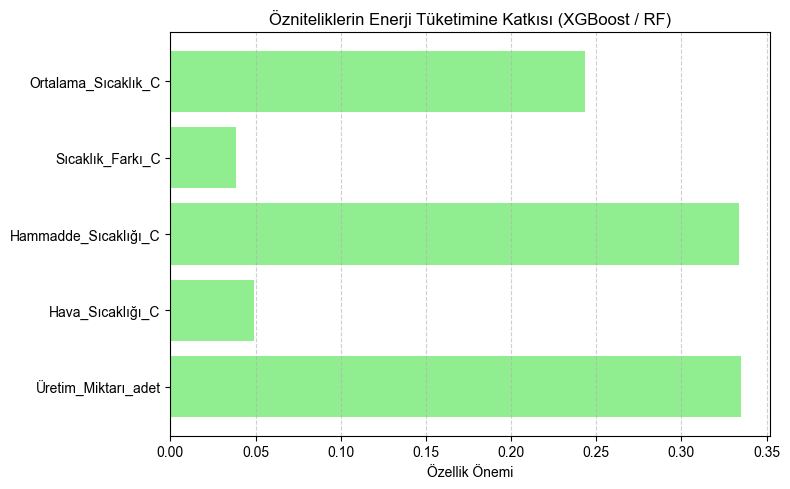

In [26]:
import matplotlib.pyplot as plt

# Ã–znitelik Ã¶nemlerini al
importances = model.feature_importances_
feature_names = X.columns

# GÃ¶rselleÅŸtir
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='lightgreen')
plt.xlabel("Ã–zellik Ã–nemi")
plt.title("Ã–zniteliklerin Enerji TÃ¼ketimine KatkÄ±sÄ± (XGBoost / RF)")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# EÄŸittiÄŸin model deÄŸiÅŸkeni neyse onu kullan (Ã¶rneÄŸin: model, rf_model vs.)
joblib.dump(model, "../results/best_model.pkl")




Model baÅŸarÄ±yla kaydedildi!
